In [13]:
import numpy as np
import updated_library as gbc
import matplotlib.lines as mlines

import seaborn as sns
sns.set()
#sns.set_style("whitegrid", {'axes.grid' : False})


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [21]:
# file paths

p_1 = "../newdat/bumps_with_wall_redo_part1/"
p_2 = "../newdat/bumps_with_wall_redo_part2/"
p_3 = "../newdat/bumps_with_wall_redo_part3/"

In [3]:
# observables
sph_obs = lambda x: 2*x - np.pi
cha_obs = lambda x, rad, cut: np.clip(a=2*rad/np.tan(x), a_min=-cut, a_max=cut)
#cha_obs = lambda x, rad, cut: cut if 2*rad/np.tan(x)>cut else (-cut if 2*rad/np.tan(x)<-cut else 2*rad/np.tan(x)>cut)
c_ = 1000

knudsen_channel = gbc.channel_var(c_, 1/2)

img_path_ = "../../AllWriteUps/Thesis/imgs/"

# Bumps with Wall

In [4]:
def load_files(path_):
    #---first values---#
    P_stacks = np.load(path_ + "p_mats.npy", allow_pickle=False)
    params = np.load(path_ + "keys.npy", allow_pickle=False)
    theta_partition = np.load(path_ + "theta_partition.npy", allow_pickle=False)
    
    heights_ = params[:,0]
    
    variance, spectral_gap = [], []

    for P in P_stacks:
        # compute the variance
        cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                               observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
        # compute the spectral gap
        spectrum = np.sort(np.real(np.linalg.eigvals(P)))
        second_eig = spectrum[-2]

        # write to inner array
        variance.append(cvar_)
        spectral_gap.append(1-second_eig)
        
    return heights_, np.array(variance), np.array(spectral_gap)

In [22]:
heights, var_p1, gap_p1 = load_files(p_1)
heights, var_p2, gap_p2 = load_files(p_2)
heights, var_p3, gap_p3 = load_files(p_3)

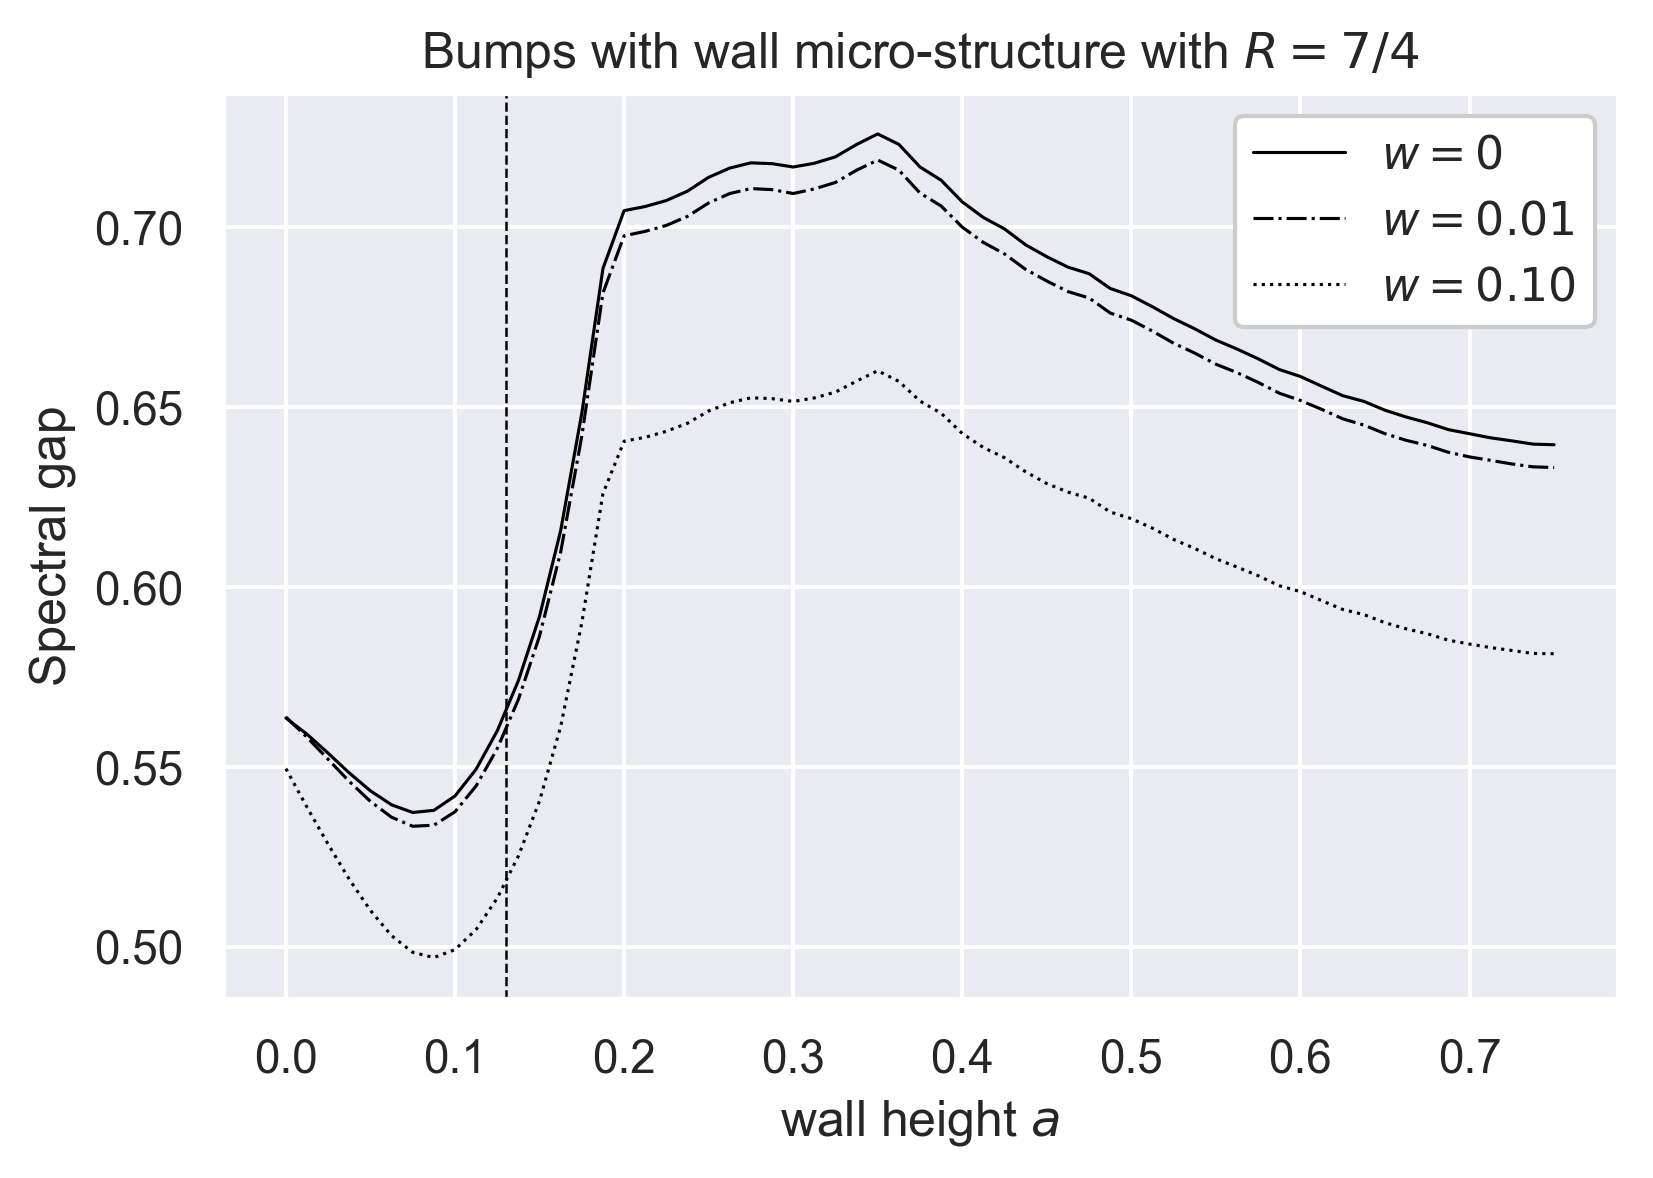

In [23]:
plt.plot(
    heights, 
    gap_p1,
    label=r"$w=0$",
    color="black",
    lw=0.75,
    ls="-"
)

plt.plot(
    heights,
    gap_p2,
    label=r"$w=0.01$",
    color="black",
    lw=0.75,
    ls="-."
)

plt.plot(
    heights,
    gap_p3,
    label=r"$w=0.10$",
    color="black",
    lw=0.75,
    ls=":"
)

plt.axvline(0.13, ls="--", lw=0.6, color="black")

plt.xlabel(r"wall height $a$")
plt.ylabel("Spectral gap")

plt.legend(facecolor='white', framealpha=1)
plt.title(r"Bumps with wall micro-structure with $R=7/4$")
plt.savefig(filename=img_path_+"bumps_with_wall_spectralgap_large_R.eps", bbox_inches='tight')
plt.show()

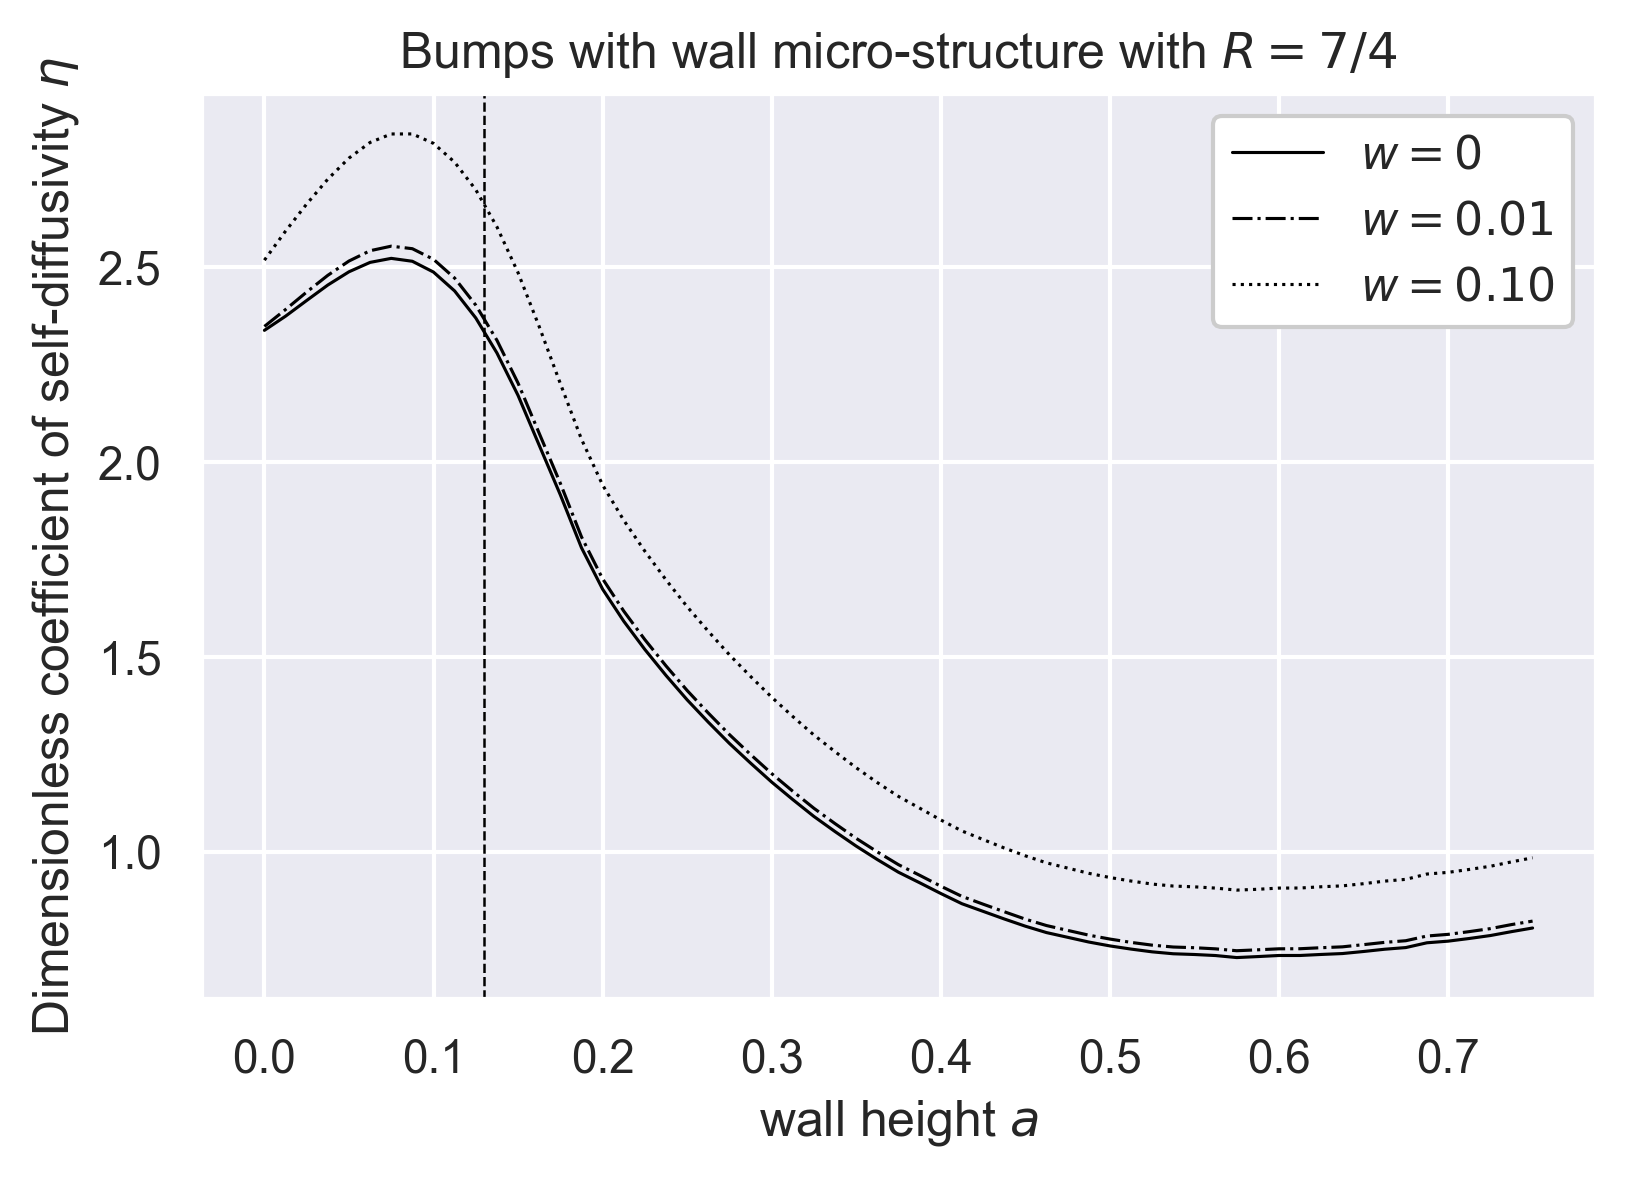

In [24]:
plt.plot(
    heights,
    var_p1/knudsen_channel,
    label=r"$w=0$",
    color="black",
    lw=0.75,
    ls="-"
)


plt.plot(
    heights,
    var_p2/knudsen_channel,
    label=r"$w=0.01$",
    color="black",
    lw=0.75,
    ls="-."
)


plt.plot(
    heights,
    var_p3/knudsen_channel,
    label=r"$w=0.10$",
    color="black",
    lw=0.75,
    ls=":"
)

plt.axvline(0.13, ls="--", lw=0.6, color="black")

plt.xlabel(r"wall height $a$")
plt.ylabel(r"Dimensionless coefficient of self-diffusivity $\eta$")
plt.title(r"Bumps with wall micro-structure with $R=7/4$")

plt.legend(facecolor='white', framealpha=1)


plt.savefig(filename=img_path_+"bumps_with_wall_nu_large_R.eps", bbox_inches='tight')
plt.show()

## Both Nu and Spectral Gap

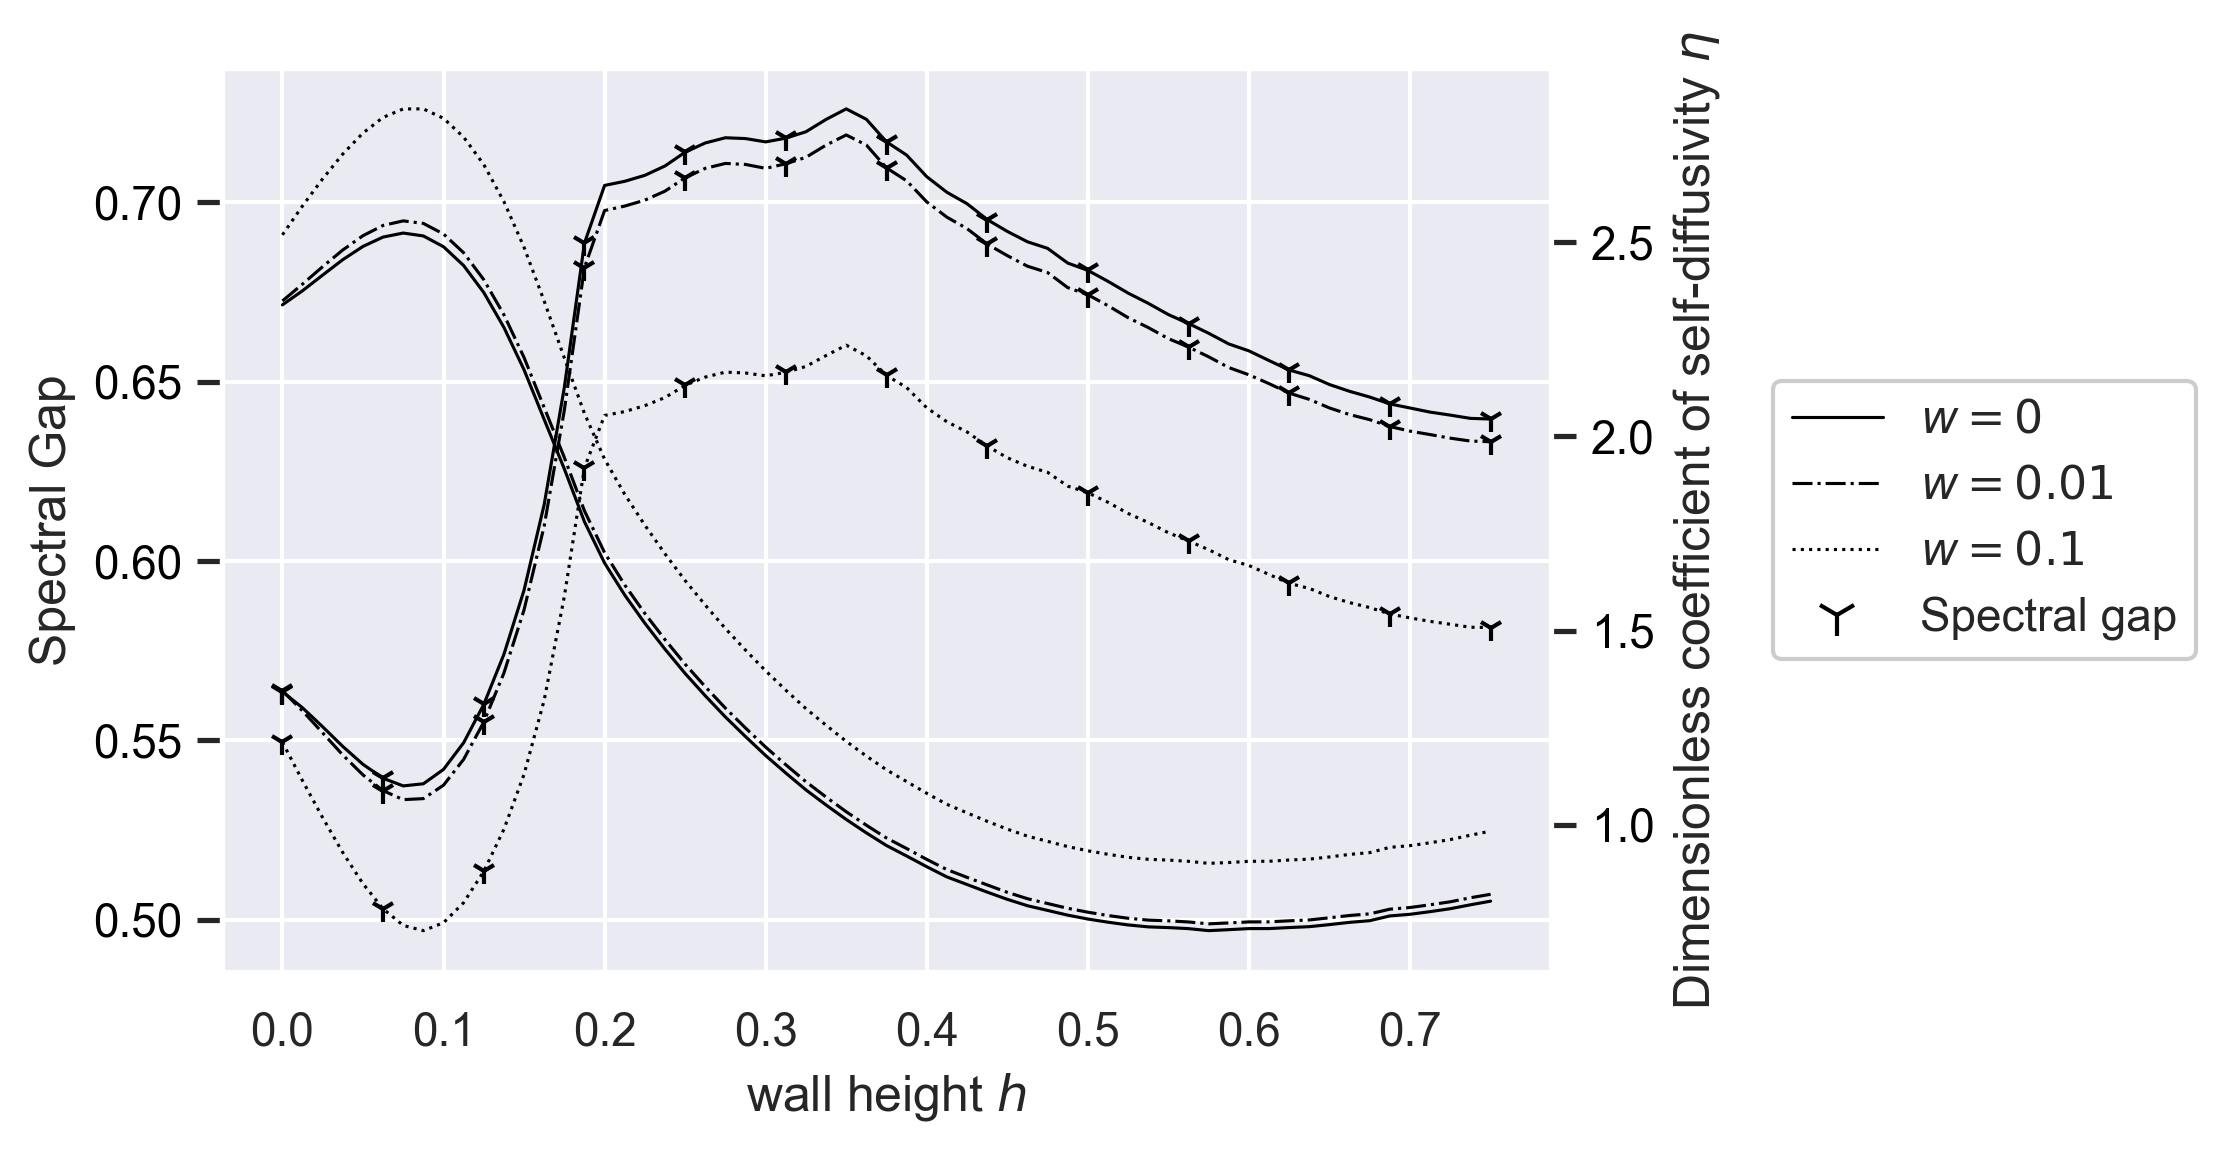

In [54]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"wall height $h$")
ax1.set_ylabel('Spectral Gap')

A1 = ax1.plot(
    heights, 
    gap_p1,
    label=r"$w=0$",
    color="black",
    lw=0.75,
    ls="-",
    marker="1",
    markevery=5
)

A2 = ax1.plot(
    heights,
    gap_p2,
    label=r"$w=0.01$",
    color="black",
    lw=0.75,
    ls="-.",
    marker="1",
    markevery=5
)

A3 = ax1.plot(
    heights,
    gap_p3,
    label=r"$w=0.10$",
    color="black",
    lw=0.75,
    ls=":",
    marker="1",
    markevery=5
)

ax1.tick_params(axis='y', labelcolor="black")
#ax1.legend(loc='center left')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)

ax2.set_ylabel(r'Dimensionless coefficient of self-diffusivity $\eta$')  # we already handled the x-label with ax1


B1 = ax2.plot(
    heights,
    var_p1/knudsen_channel,
    label=r"$w=0$",
    color="black",
    lw=0.75,
    ls="-",
    marker="",
    markevery=5
)


B2 = ax2.plot(
    heights,
    var_p2/knudsen_channel,
    label=r"$w=0.01$",
    color="black",
    lw=0.75,
    ls="-.",
    marker="",
    markevery=5
)


B3 = ax2.plot(
    heights,
    var_p3/knudsen_channel,
    label=r"$w=0.10$",
    color="black",
    lw=0.75,
    ls=":",
    marker="",
    markevery=5
)


ax2.tick_params(axis='y', labelcolor="black")
#ax2.legend(loc='center right')

# added these three lines
#lns = A1+A2+A3 #+B1+B2+B3
#labs = [l.get_label() for l in lns]

lns = [mlines.Line2D([], [], color='black', ls=S, lw=0.75) for S in ["-", "-.", ":"]]
labs = [f"$w={x}$" for x in [0, 0.01, 0.1]]

#nu_m = mlines.Line2D([], [], color='black', marker='1', ls="", markersize=10)
gap_m = mlines.Line2D([], [], color='black', marker='1', ls="", markersize=10)

lns += [gap_m]
labs += ["Spectral gap"]

ax1.legend(lns, labs, loc='center left', facecolor='white', framealpha=1, bbox_to_anchor=(1.15, 0.5))
#ax1.legend(loc='center left', facecolor='white', framealpha=1, bbox_to_anchor=(1.15, 0.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped


#plt.title(r"Spectral gap and $\nu$ for the bups")

plt.savefig(filename=img_path_+"bumps_with_wall_gap_and_nu.eps", bbox_inches='tight')
plt.show()

In [5]:
# file paths

p_1 = "../newdat/bumps_with_wall_redo_part1_high_K/"
p_2 = "../newdat/bumps_with_wall_redo_part2_high_K/"
p_3 = "../newdat/bumps_with_wall_redo_part3_high_K/"

heights, var_p1, gap_p1 = load_files(p_1)
heights, var_p2, gap_p2 = load_files(p_2)
heights, var_p3, gap_p3 = load_files(p_3)

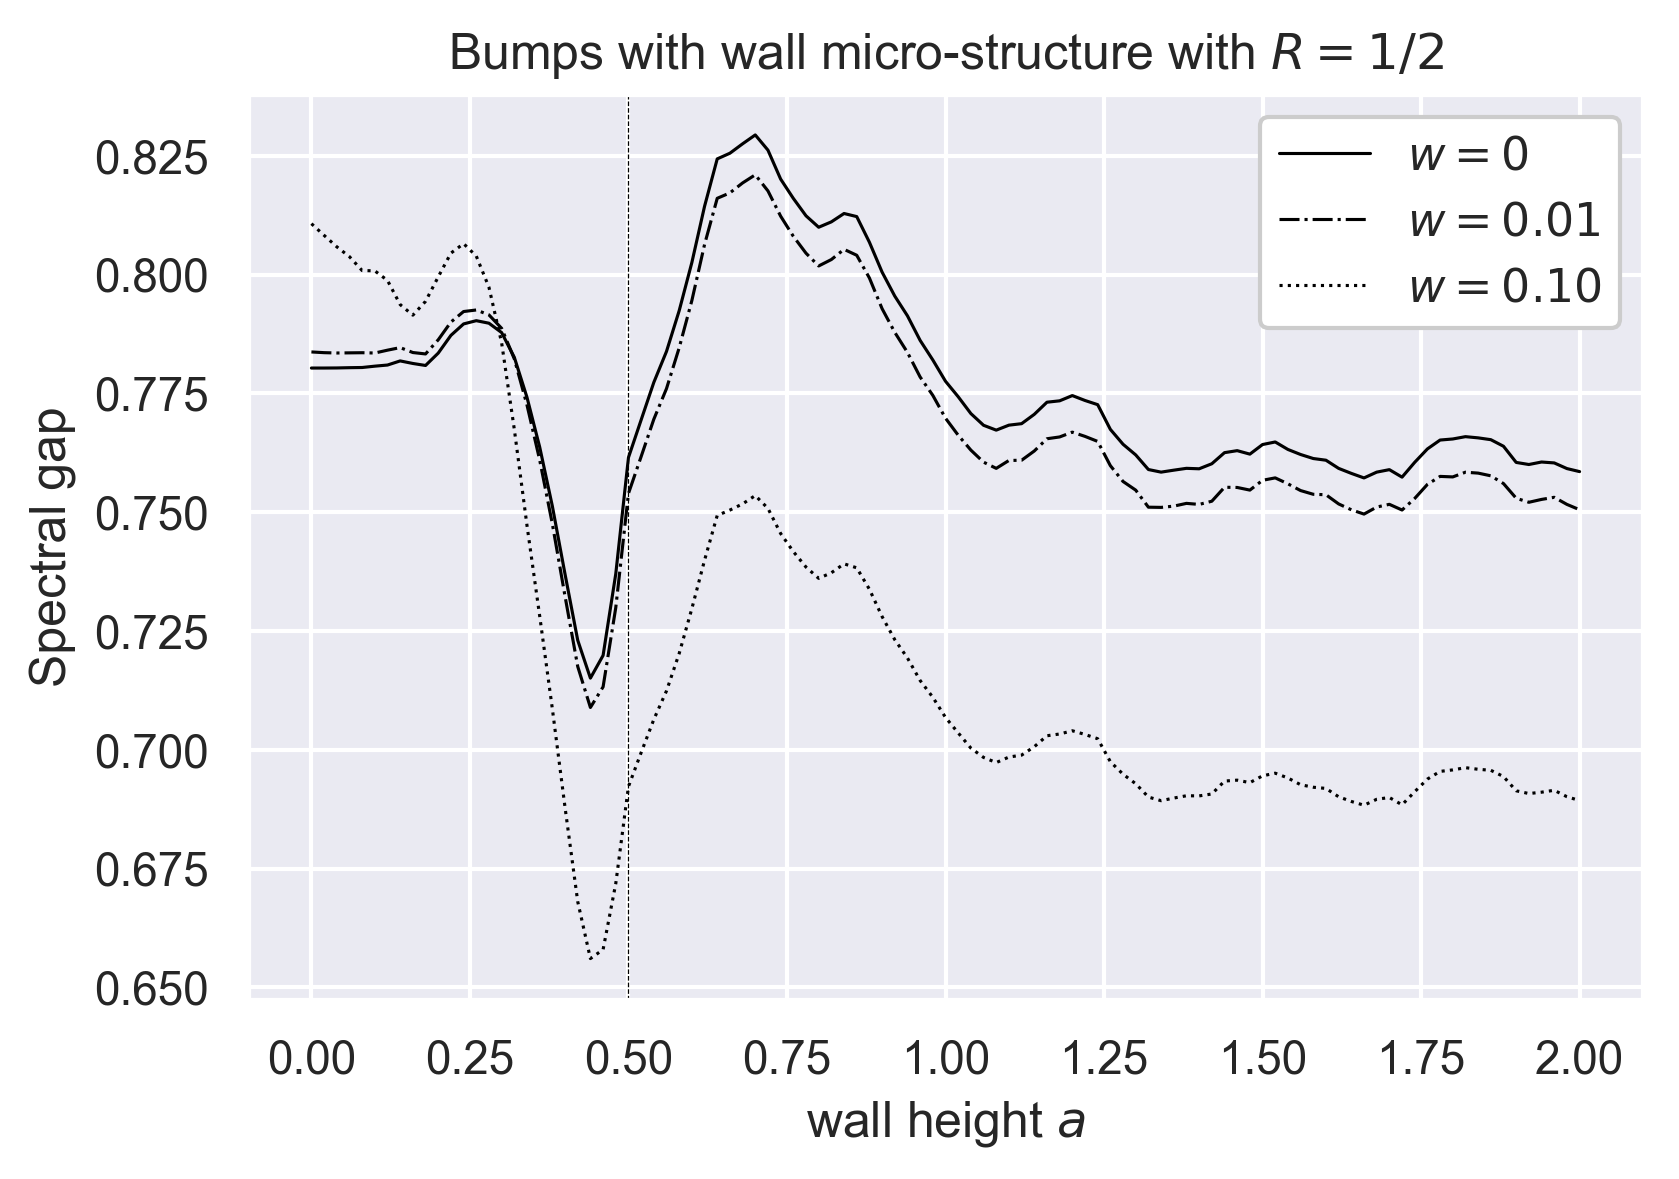

In [19]:
plt.axvline(0.5, ls="--", lw=0.3, color="black")


plt.plot(
    heights, 
    gap_p1,
    label=r"$w=0$",
    color="black",
    lw=0.75,
    ls="-"
)

plt.plot(
    heights,
    gap_p2,
    label=r"$w=0.01$",
    color="black",
    lw=0.75,
    ls="-."
)

plt.plot(
    heights,
    gap_p3,
    label=r"$w=0.10$",
    color="black",
    lw=0.75,
    ls=":"
)

plt.xlabel(r"wall height $a$")
plt.ylabel("Spectral gap")
plt.title(r"Bumps with wall micro-structure with $R=1/2$")
plt.legend(facecolor='white', framealpha=1)

plt.savefig(filename=img_path_+"bumps_with_wall_spectralgap_small_R.eps", bbox_inches='tight')
plt.show()

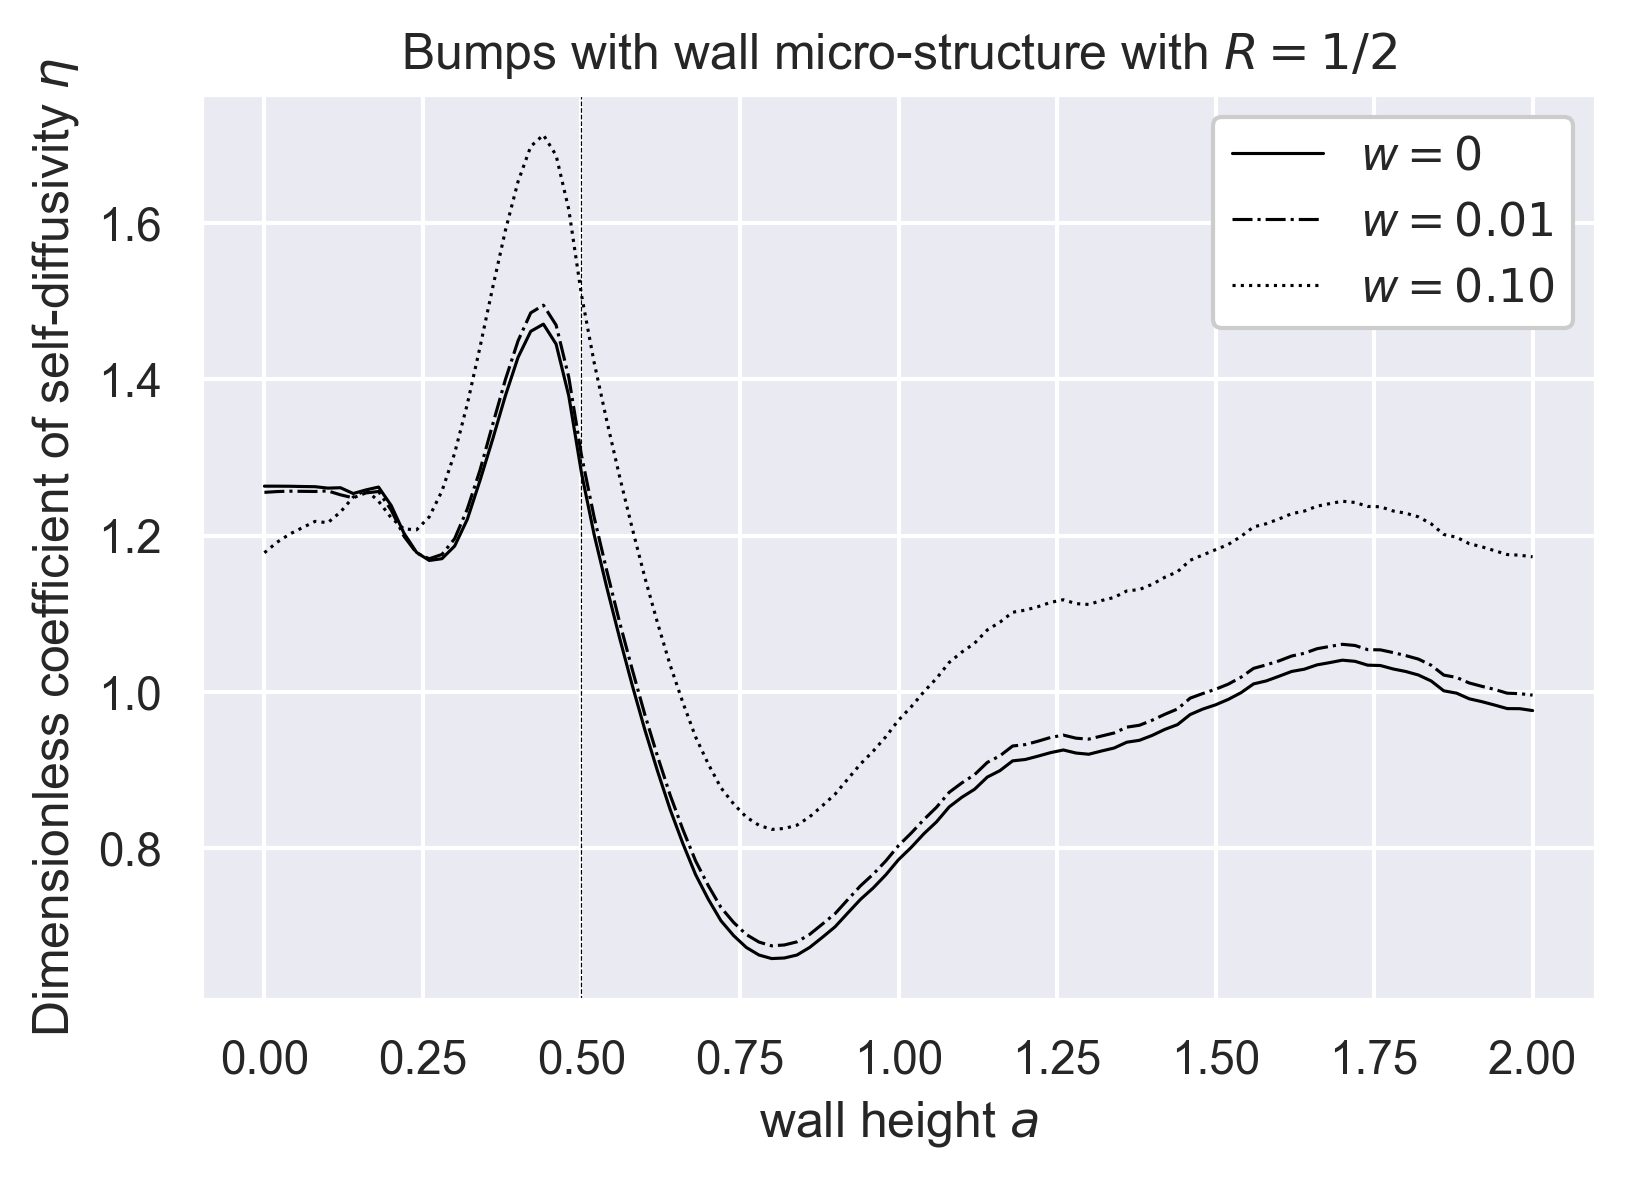

In [20]:
plt.axvline(0.5, ls="--", lw=0.3, color="black")


plt.plot(
    heights,
    var_p1/knudsen_channel,
    label=r"$w=0$",
    color="black",
    lw=0.75,
    ls="-"
)


plt.plot(
    heights,
    var_p2/knudsen_channel,
    label=r"$w=0.01$",
    color="black",
    lw=0.75,
    ls="-."
)


plt.plot(
    heights,
    var_p3/knudsen_channel,
    label=r"$w=0.10$",
    color="black",
    lw=0.75,
    ls=":"
)

plt.xlabel(r"wall height $a$")
plt.ylabel(r"Dimensionless coefficient of self-diffusivity $\eta$")
plt.title(r"Bumps with wall micro-structure with $R=1/2$")
plt.legend(facecolor='white', framealpha=1)


plt.savefig(filename=img_path_+"bumps_with_wall_nu_small_R.eps", bbox_inches='tight')
plt.show()

## Both Nu and Spectral Gap

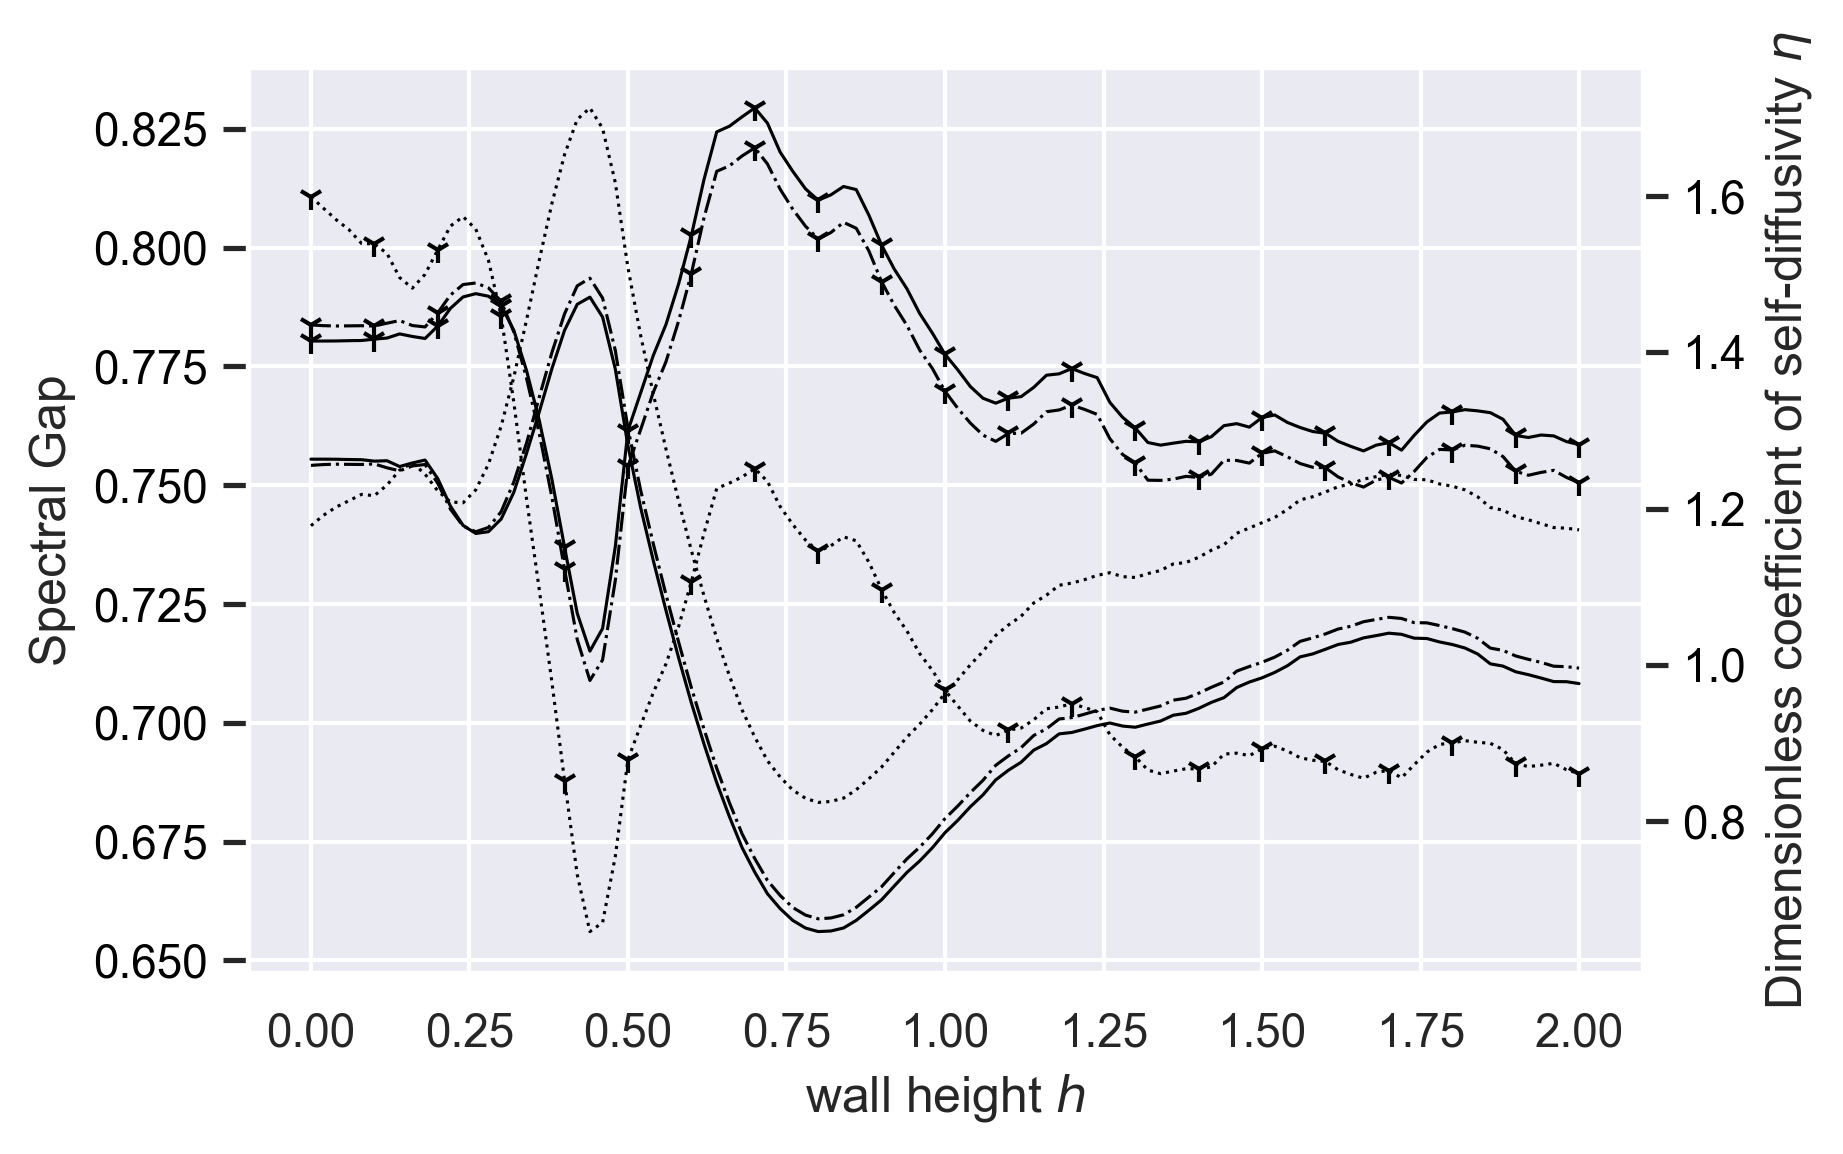

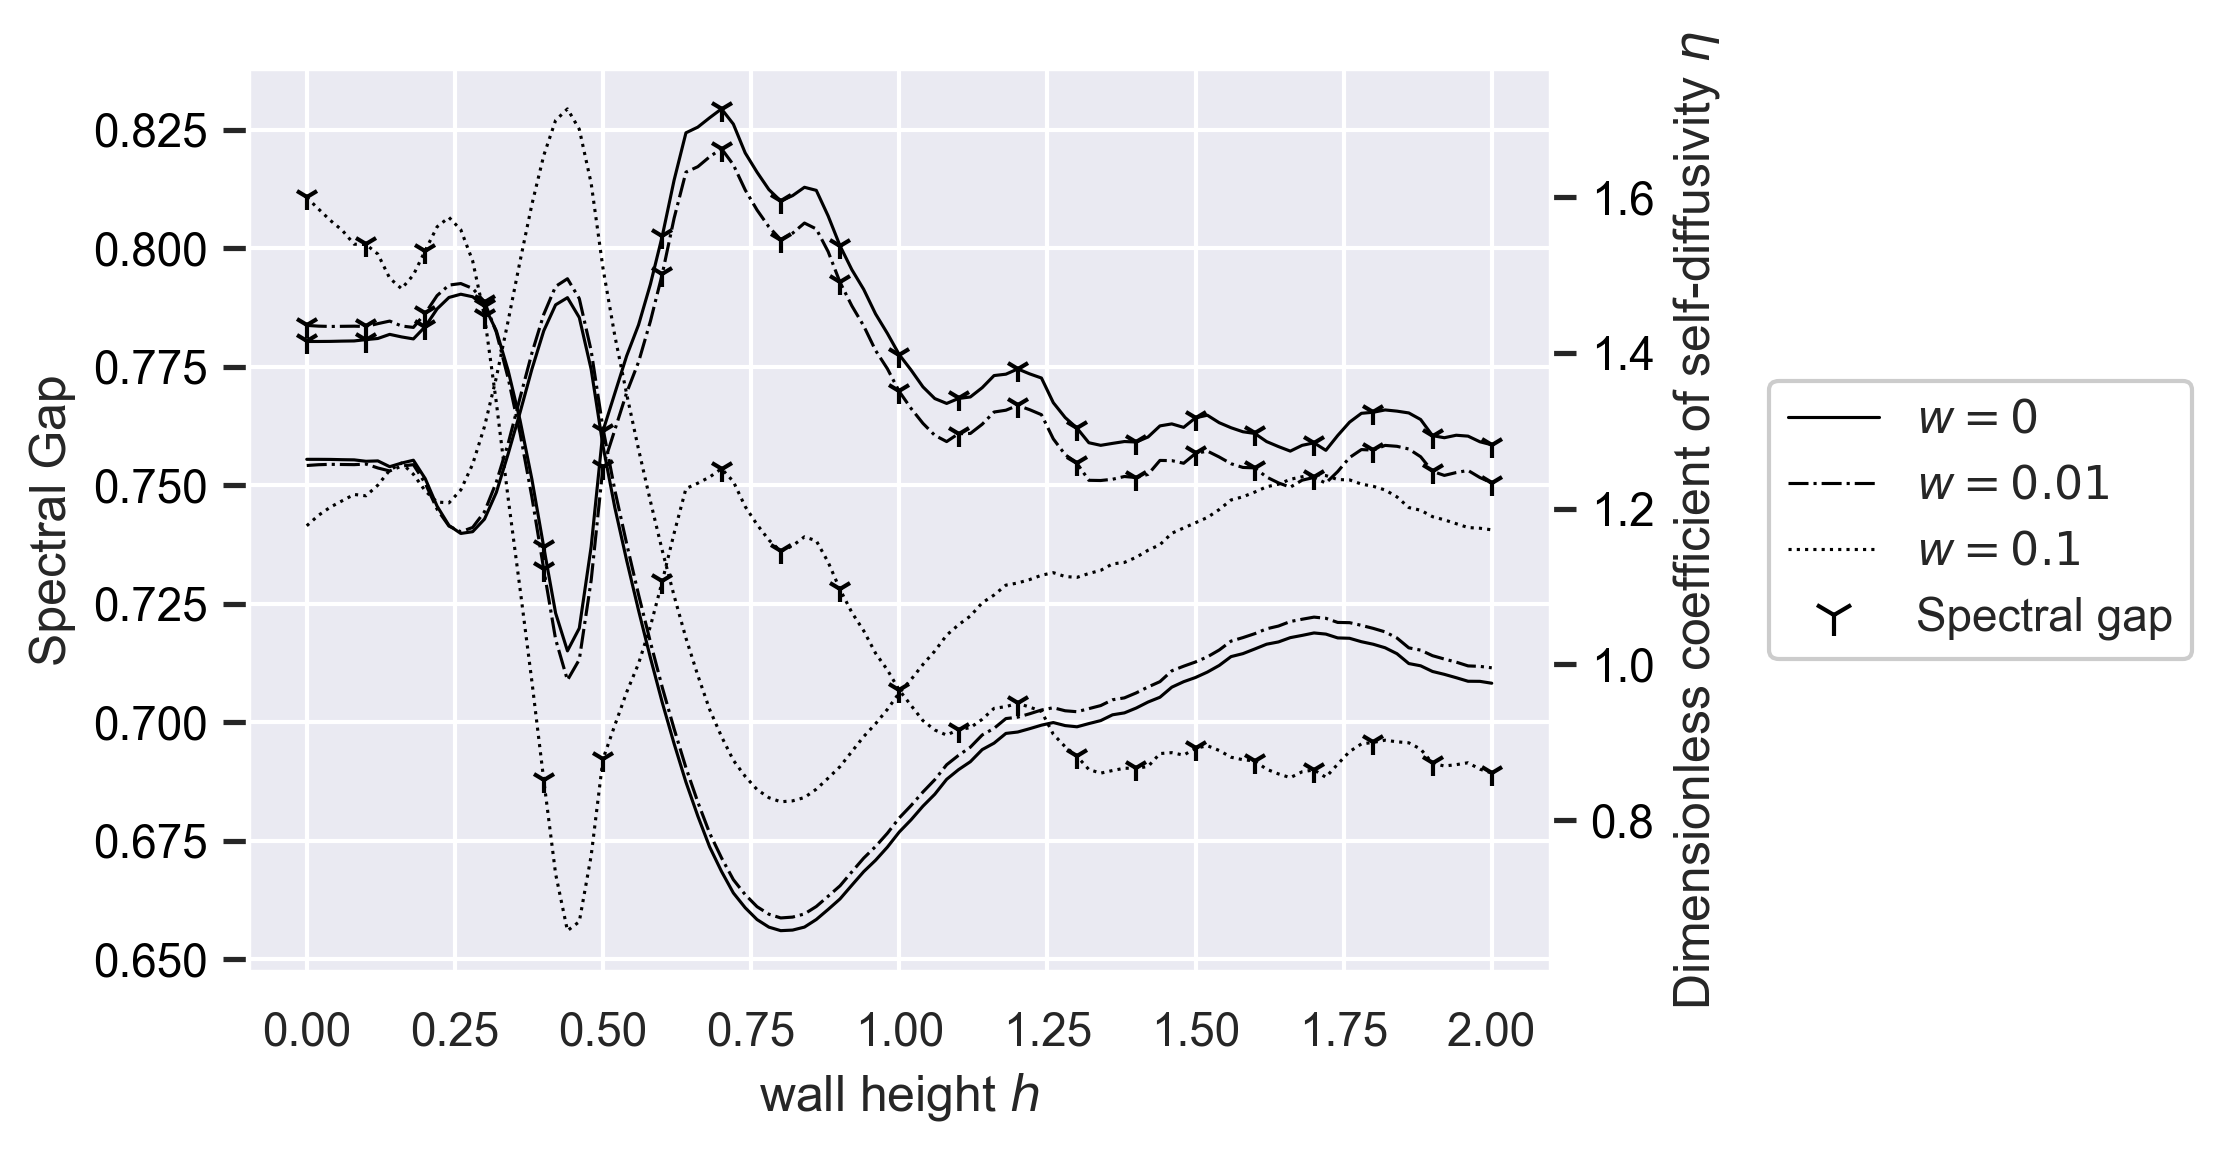

In [14]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"wall height $h$")
ax1.set_ylabel('Spectral Gap')

A1 = ax1.plot(
    heights, 
    gap_p1,
    label=r"$w=0$",
    color="black",
    lw=0.75,
    ls="-",
    marker="1",
    markevery=5
)

A2 = ax1.plot(
    heights,
    gap_p2,
    label=r"$w=0.01$",
    color="black",
    lw=0.75,
    ls="-.",
    marker="1",
    markevery=5
)

A3 = ax1.plot(
    heights,
    gap_p3,
    label=r"$w=0.10$",
    color="black",
    lw=0.75,
    ls=":",
    marker="1",
    markevery=5
)

ax1.tick_params(axis='y', labelcolor="black")
#ax1.legend(loc='center left')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)

ax2.set_ylabel(r'Dimensionless coefficient of self-diffusivity $\eta$')  # we already handled the x-label with ax1


B1 = ax2.plot(
    heights,
    var_p1/knudsen_channel,
    label=r"$w=0$",
    color="black",
    lw=0.75,
    ls="-",
    marker="",
    markevery=5
)


B2 = ax2.plot(
    heights,
    var_p2/knudsen_channel,
    label=r"$w=0.01$",
    color="black",
    lw=0.75,
    ls="-.",
    marker="",
    markevery=5
)


B3 = ax2.plot(
    heights,
    var_p3/knudsen_channel,
    label=r"$w=0.10$",
    color="black",
    lw=0.75,
    ls=":",
    marker="",
    markevery=5
)


ax2.tick_params(axis='y', labelcolor="black")
#ax2.legend(loc='center right')

# added these three lines
#lns = A1+A2+A3 #+B1+B2+B3
#labs = [l.get_label() for l in lns]

lns = [mlines.Line2D([], [], color='black', ls=S, lw=0.75) for S in ["-", "-.", ":"]]
labs = [f"$w={x}$" for x in [0, 0.01, 0.1]]

#nu_m = mlines.Line2D([], [], color='black', marker='1', ls="", markersize=10)
gap_m = mlines.Line2D([], [], color='black', marker='1', ls="", markersize=10)

lns += [gap_m]
labs += ["Spectral gap"]

ax1.legend(lns, labs, loc='center left', facecolor='white', framealpha=1, bbox_to_anchor=(1.15, 0.5))
#ax1.legend(loc='center left', facecolor='white', framealpha=1, bbox_to_anchor=(1.15, 0.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped


#plt.title(r"Spectral gap and $\nu$ for the bups")

#plt.savefig(filename=img_path_+"bumps_with_wall_gap_and_nu.eps", bbox_inches='tight')
plt.show()